In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
class perceptron:
  def __init__(self,num_inputs,learning_rate= 0.01):
    self.weights = np.random.rand(num_inputs+1)
    self.learning_rate = learning_rate
  #define first linear layer
  def linear(self,inputs):
    Z = inputs @ self.weights[1:].T + self.weights[0]  #@ is the matrix multiplication operator in Python (same as np.dot for numpy arrays)
    #self.weights[1:] means all rows except the bias row..T → transpose, so that the multiplication aligns dimensions correctly
    return Z
  def heavside_step(self,Z):
    return np.where(Z>0,1,0)
  def predict(self,inputs):
    Z = self.linear(inputs)
    try:
      pred = []
      for z in Z:
        pred.append(self.heavside_step(z))
    except:
      return self.heavside_step(Z)
    return pred
  def loss(self,predictions,targets):
    loss = predictions-targets
    return loss
  def training(self,inputs,targets):
    predictions = self.predict(inputs)
    error = self.loss(predictions,targets)
    self.weights[1:] += self.learning_rate*error*inputs
    self.weights[0] += self.learning_rate*error
  def fit(self,inputs,targets,epochs):
    for epo in range(epochs):
      for input,target in zip(inputs,targets):
        self.training(input,target)






Accuracy: 0.932


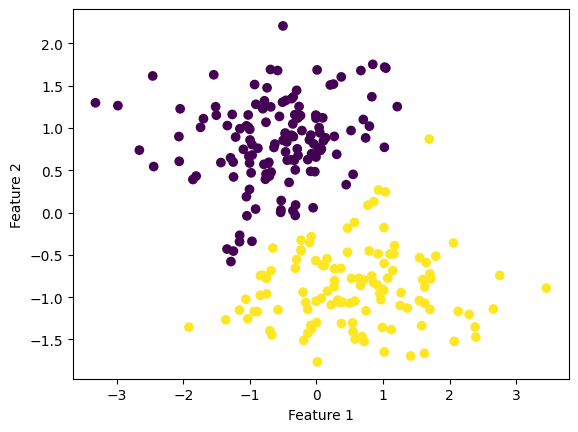

In [4]:
X,y = make_blobs(n_samples=1000,n_features=2,centers = 2,cluster_std=3,random_state=111)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=111,shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
percep = perceptron(num_inputs=X_train.shape[1])
percep.fit(X_train,y_train,epochs=100)
prep = percep.predict(X_test)
accuracy = np.mean(prep != y_test)
print("Accuracy:", accuracy)
plt.scatter(X_test[:, 0], X_test[:, 1], c=prep)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()